In [ ]:
import numpy as np
import tensorflow as tf 
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import csv
import nltk

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!wget --no-check-certificate \https://storage.googleapis.com/dataset-uploader/bbc/bbc-text.csv\
  -O /tmp/bbc-text.csv

--2020-11-26 12:41:07--  https://storage.googleapis.com/dataset-uploader/bbc/bbc-text.csv
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.20.128, 74.125.197.128, 74.125.142.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.20.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5057493 (4.8M) [text/csv]
Saving to: ‘/tmp/bbc-text.csv’

/tmp/bbc-text.csv   100%[===================>]   4.82M  --.-KB/s    in 0.03s   

2020-11-26 12:41:07 (188 MB/s) - ‘/tmp/bbc-text.csv’ saved [5057493/5057493]



In [ ]:
voc_size = 1000
embedding_dim = 16
max_length = 120
trunc_type = 'post'
padding_type = 'post'
oov_tok = "<OOV"
training_portion = .8

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
from nltk.corpus import stopwords 

In [ ]:
stopwords_english = stopwords.words('english')

In [ ]:
stopwords_english

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [ ]:
sentences = []
labels = []


In [ ]:
with open("/tmp/bbc-text.csv",'r') as csvfile:
  reader = csv.reader(csvfile, delimiter = ',')
  next(reader)
  for row in reader:
    labels.append(row[0])
    sentence = row[1]
    for word in stopwords_english :
      token = " " + word + " "
      sentence = sentence.replace(token," ")
    sentences.append(sentence)
print(len(labels))
print(len(sentences))
print(sentences[0])




2225
2225
tv future hands viewers home theatre systems  plasma high-definition tvs  digital video recorders moving living room  way people watch tv radically different five years  time.  according expert panel gathered annual consumer electronics show las vegas discuss new technologies impact one favourite pastimes. us leading trend  programmes content delivered viewers via home networks  cable  satellite  telecoms companies  broadband service providers front rooms portable devices.  one talked-about technologies ces digital personal video recorders (dvr pvr). set-top boxes  like us tivo uk sky+ system  allow people record  store  play  pause forward wind tv programmes want.  essentially  technology allows much personalised tv. also built-in high-definition tv sets  big business japan us  slower take europe lack high-definition programming. people forward wind adverts  also forget abiding network channel schedules  putting together a-la-carte entertainment. us networks cable satellite 

In [ ]:
print(labels[5])

politics


In [ ]:
train_size = int(len(sentences) * training_portion)
train_sentences = sentences[:train_size]
train_labels = labels[:train_size]

validation_sentences =  sentences[train_size:]
validation_labels = labels[train_size:]

validation_size = int(len(sentences) - train_size)


In [ ]:
print(train_size)
print(len(train_sentences))
print(len(train_labels))
print(len(validation_sentences))
print(len(validation_labels))
print(validation_size)

1780
1780
1780
445
445
445


In [ ]:
tokenizer = Tokenizer(num_words = voc_size , oov_token= oov_tok)
tokenizer.fit_on_texts(train_sentences)
word_index = tokenizer.word_index

train_sentences = tokenizer.texts_to_sequences(train_sentences)
training_padded = pad_sequences(sequences = train_sentences , padding = padding_type , maxlen= max_length)




In [ ]:
print(len(training_padded[0]))
print(len(train_sentences[0]))

120
426


In [ ]:
validation_sentences = tokenizer.texts_to_sequences(validation_sentences)
validation_padded = pad_sequences(sequences = validation_sentences , padding = padding_type , maxlen= max_length)

In [ ]:
print(len(validation_padded[0]))
print(len(validation_sentences[0]))

120
156


In [ ]:
label_tokenizer = Tokenizer()
label_tokenizer.fit_on_texts(labels)

training_label_seq = np.array(label_tokenizer.texts_to_sequences(train_labels))
validation_label_seq = np.array(label_tokenizer.texts_to_sequences(validation_labels))


In [ ]:
print(training_label_seq[0])
print(validation_label_seq[0])

[4]
[5]


In [ ]:
model = tf.keras.Sequential([
        tf.keras.layers.Embedding(voc_size,embedding_dim ,input_length= max_length),
        tf.keras.layers.GlobalAveragePooling1D(),
        tf.keras.layers.Dense(24,activation='relu'),
        tf.keras.layers.Dense(6,activation='softmax')
]                           
)
model.compile(loss = 'sparse_categorical_crossentropy',optimizer = 'Adam',metrics = ['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 120, 16)           16000     
_________________________________________________________________
global_average_pooling1d_2 ( (None, 16)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 24)                408       
_________________________________________________________________
dense_5 (Dense)              (None, 6)                 150       
Total params: 16,558
Trainable params: 16,558
Non-trainable params: 0
_________________________________________________________________


In [ ]:
from keras.callbacks import ModelCheckpoint,EarlyStopping
checkpointer = ModelCheckpoint('text_classification_model.hdf5', monitor='val_loss', verbose=1, save_best_only=True)

In [ ]:
history = model.fit(training_padded,
                    training_label_seq,
                    batch_size= 64,
                    callbacks=[checkpointer],
                    epochs =50, 
                    verbose = 1,
                    shuffle=True,
                    validation_data=(validation_padded , validation_label_seq))

Epoch 1/50
16/28 [================>.............] - ETA: 0s - loss: 1.7810 - accuracy: 0.1963
Epoch 00001: val_loss improved from inf to 1.75689, saving model to text_classification_model.hdf5
28/28 [==============================] - 0s 9ms/step - loss: 1.7743 - accuracy: 0.1865 - val_loss: 1.7569 - val_accuracy: 0.1955
Epoch 2/50
16/28 [================>.............] - ETA: 0s - loss: 1.7472 - accuracy: 0.2490
Epoch 00002: val_loss improved from 1.75689 to 1.71843, saving model to text_classification_model.hdf5
28/28 [==============================] - 0s 5ms/step - loss: 1.7384 - accuracy: 0.2949 - val_loss: 1.7184 - val_accuracy: 0.3596
Epoch 3/50
17/28 [=================>............] - ETA: 0s - loss: 1.7042 - accuracy: 0.3438
Epoch 00003: val_loss improved from 1.71843 to 1.67255, saving model to text_classification_model.hdf5
28/28 [==============================] - 0s 5ms/step - loss: 1.6950 - accuracy: 0.3500 - val_loss: 1.6726 - val_accuracy: 0.2831
Epoch 4/50
17/28 [========

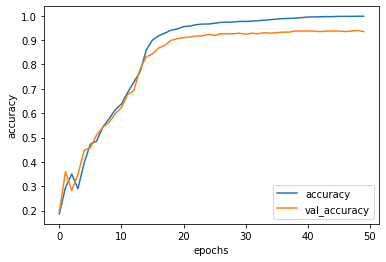

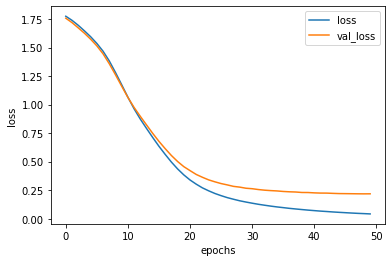

In [ ]:
import matplotlib.pyplot as plt

def plot_graphs(history,string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("epochs")
  plt.ylabel(string)
  plt.legend([string,'val_'+string])
  plt.show()

plot_graphs(history,"accuracy")
plot_graphs(history,"loss")


In [ ]:
!cp /content/text_classification_model.hdf5 /content/drive/My\ Drive